<a href="https://colab.research.google.com/github/skywalker0803r/Microsoft-DAT257x-Reinforcement-Learning-Explained/blob/master/Ex2_4_Thompson_Beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.4 Thompson Beta

In [0]:
import numpy as np
import sys

### Interface
class Environment(object):

    def reset(self):
        raise NotImplementedError('Inheriting classes must override reset.')

    def actions(self):
        raise NotImplementedError('Inheriting classes must override actions.')

    def step(self):
        raise NotImplementedError('Inheriting classes must override step')

class ActionSpace(object):
    
    def __init__(self, actions):
        self.actions = actions
        self.n = len(actions)
        
### BanditEnv Environment
        
class BanditEnv(Environment):
    def __init__(self, num_actions = 10, distribution = "bernoulli", evaluation_seed="387"):
        super(BanditEnv, self).__init__()
        
        self.action_space = ActionSpace(range(num_actions))
        self.distribution = distribution
        
        np.random.seed(evaluation_seed)
        
        self.reward_parameters = None
        if distribution == "bernoulli":
            self.reward_parameters = np.random.rand(num_actions)
        elif distribution == "normal":
            self.reward_parameters = (np.random.randn(num_actions), np.random.rand(num_actions))
        elif distribution == "heavy-tail":
            self.reward_parameters = np.random.rand(num_actions)
        else:
            print("Please use a supported reward distribution", flush = True)
            sys.exit(0)
        
        if distribution != "normal":
            self.optimal_arm = np.argmax(self.reward_parameters)
        else:
            self.optimal_arm = np.argmax(self.reward_parameters[0])
    
    def reset(self):
        self.is_reset = True
        return None
    
    def compute_gap(self, action):
        if self.distribution != "normal":
            gap = np.absolute(self.reward_parameters[self.optimal_arm] - self.reward_parameters[action])
        else:
            gap = np.absolute(self.reward_parameters[0][self.optimal_arm] - self.reward_parameters[0][action])
        return gap
    
    def step(self, action):
        self.is_reset = False
        valid_action = True
        if (action is None or action < 0 or action >= self.action_space.n):
            print("Algorithm chose an invalid action; reset reward to -inf", flush = True)
            reward = float("-inf")
            gap = float("inf")
            valid_action = False
        
        if self.distribution == "bernoulli":
            if valid_action:
                reward = np.random.binomial(1, self.reward_parameters[action])
                gap = self.reward_parameters[self.optimal_arm] - self.reward_parameters[action]
        elif self.distribution == "normal":
            if valid_action:
                reward = self.reward_parameters[0][action] + self.reward_parameters[1][action] * np.random.randn()
                gap = self.reward_parameters[0][self.optimal_arm] - self.reward_parameters[0][action]
        elif self.distribution == "heavy-tail":
            if valid_action:
                reward = self.reward_parameters[action] + np.random.standard_cauchy()
                gap = self.reward_parameters[self.optimal_arm] - self.reward_parameters[action]        #HACK to compute expected gap
        else:
            print("Please use a supported reward distribution", flush = True)
            sys.exit(0)
            
        return(None, reward, self.is_reset, '')
import numpy as np
import pandas as pd
from collections import namedtuple
from matplotlib import pyplot as plt

EpisodeStats = namedtuple("Stats",["episode_lengths", "episode_rewards", "episode_running_variance"])
TimestepStats = namedtuple("Stats",["cumulative_rewards", "regrets"])

def plot_episode_stats(stats, smoothing_window=10, hideplot=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    if hideplot:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    if hideplot:
        plt.close(fig2)
    else:
        plt.show(fig2)

    return fig1, fig2

def plot_pgresults(stats, smoothing_window=20, hideplot=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    if hideplot:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    if hideplot:
        plt.close(fig2)
    else:
        plt.show(fig2)
       
    # Plot time steps and episode number
    fig3 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_running_variance)
    plt.xlabel("Episode")
    plt.ylabel("Running Variance")
    plt.title("Running Variance over Time")
    if hideplot:
        plt.close(fig3)
    else:
        plt.show(fig3)
        
    # Plot time steps and episode number
    fig4 = plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(stats.episode_lengths)), np.cumsum(stats.episode_lengths))
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Episode Length")
    plt.title("Cumulative Episode Length over Time")
    if hideplot:
        plt.close(fig4)
    else:
        plt.show(fig4)

    return fig1, fig2, fig3, fig4

def plot_dqnresults(stats, smoothing_window=20, hideplot=False):
    # Plot the episode length over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    if hideplot:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    if hideplot:
        plt.close(fig2)
    else:
        plt.show(fig2)
              
    # Plot time steps and episode number
    fig4 = plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(stats.episode_lengths)), np.cumsum(stats.episode_lengths))
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Episode Length")
    plt.title("Cumulative Episode Length over Time")
    if hideplot:
        plt.close(fig4)
    else:
        plt.show(fig4)

    return fig1, fig2, fig3, fig4

def plot_reward_regret(stats, smoothing_window=1, hideplot=False):
    # Plot the cumulative reward over time
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.cumulative_rewards)
    plt.xlabel("Timestep")
    plt.ylabel("Cumulative Reward")
    plt.title("Cumulative Reward over Timestep")
    if hideplot:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the regret over time
    fig2 = plt.figure(figsize=(10,5))
    plt.plot(stats.regrets)
    plt.xlabel("Timestep")
    plt.ylabel("Regret")
    plt.title("Regret over Timestep")
    if hideplot:
        plt.close(fig2)
    else:
        plt.show(fig2)
             
    return fig1, fig2   

def plot_arm_rewards(y, hideplot=False):
    
    N = len(y)
    x = range(N)
    width = 1/1.5
    
    fig1 = plt.figure(figsize=(10,5))
    plt.bar(x, y, width)
    
    plt.xlabel("Arm")
    plt.ylabel("Probability")
    plt.title("Arm's Reward Distribution")
    
    if hideplot:
        plt.close(fig1)
    else:
        plt.show(fig1)
             
    return fig1
import numpy as np
import sys
#import lib.plotting as plotting
from matplotlib import pyplot as plt
from matplotlib import pylab
import matplotlib.gridspec as gridspec

class Experiment(object):
    def __init__(self, env, agent):
        
        self.env = env
        self.agent = agent
        
        self.episode_length = np.array([0])
        self.episode_reward = np.array([0])
        
        self.fig = pylab.figure(figsize=(10, 5))
        gs = gridspec.GridSpec(2, 2)
        self.ax = pylab.subplot(gs[:, 0])
        self.ax.xaxis.set_visible(False)
        self.ax.yaxis.set_visible(False)
        
        if hasattr(self.env, '_cliff'): # Hardcode to nicely display grid for cliffwalkingenv
            self.ax.xaxis.set_visible(True)
            self.ax.yaxis.set_visible(True)
            self.ax.set_xticks(np.arange(-.5, 12, 1), minor=True);
            self.ax.set_yticks(np.arange(-.5, 4, 1), minor=True);
            self.ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
            
        if hasattr(self.env, 'winds'): # Hardcode to nicely display grid for windygridworldenv
            self.ax.xaxis.set_visible(True)
            self.ax.yaxis.set_visible(True)
            self.ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
            self.ax.set_yticks(np.arange(-.5, 7, 1), minor=True);
            self.ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
        
        self.ax1 = pylab.subplot(gs[0, 1])
        self.ax1.yaxis.set_label_position("right")
        self.ax1.set_ylabel('Length')
        
        self.ax1.set_xlim(0, max(10, len(self.episode_length)+1))
        self.ax1.set_ylim(0, 51)
        
        self.ax2 = pylab.subplot(gs[1, 1])
        self.ax2.set_xlabel('Episode')
        self.ax2.yaxis.set_label_position("right")
        self.ax2.set_ylabel('Reward')
        self.ax2.set_xlim(0, max(10, len(self.episode_reward)+1))
        self.ax2.set_ylim(0, 2)
        
        self.line, = self.ax1.plot(range(len(self.episode_length)),self.episode_length)
        self.line2, = self.ax2.plot(range(len(self.episode_reward)),self.episode_reward)
        
    def update_display_step(self):
        if not hasattr(self, 'imgplot'):
            self.imgplot = self.ax.imshow(self.env.render(mode='rgb_array'), interpolation='none', cmap='viridis')
        else:
            self.imgplot.set_data(self.env.render(mode='rgb_array'))
    
        self.fig.canvas.draw()
        
    def update_display_episode(self):  
        self.line.set_data(range(len(self.episode_length)),self.episode_length)
        self.ax1.set_xlim(0, max(10, len(self.episode_length)+1))
        self.ax1.set_ylim(0, max(self.episode_length)+1)
        
        self.line2.set_data(range(len(self.episode_reward)),self.episode_reward)
        self.ax2.set_xlim(0, max(10, len(self.episode_reward)+1))
        self.ax2.set_ylim(min(self.episode_reward)-1, max(self.episode_reward)+1)
        
        self.fig.canvas.draw()     
        
    def run_bandit(self, max_number_of_trials=1000, display_frequency=1):
        self.fig.clf()
        
        print("Distribution:", self.env.distribution, self.env.reward_parameters, flush = True)
        print("Optimal arm:", self.env.optimal_arm, flush = True)
        
        if self.env.distribution != "normal":
            plot_arm_rewards(self.env.reward_parameters)
        #else:
            #plotting.plot_arm_rewards(self.env.reward_parameters[0])
        
        stats = TimestepStats(
            cumulative_rewards=np.zeros(max_number_of_trials),
            regrets=np.zeros(max_number_of_trials))   
            
        cumulative_reward = 0.0
        cumulative_regret = 0.0
        
        for trial in range(max_number_of_trials):
            action = self.agent.act()
            
            _ , reward, done, _ = self.env.step(action)       
            self.agent.feedback(action, reward)
            cumulative_reward += reward

            gap = self.env.compute_gap(action)
            if action != self.env.optimal_arm:
                cumulative_regret += gap

            stats.cumulative_rewards[trial] = cumulative_reward
            stats.regrets[trial] = cumulative_regret
            

        print("--------------------------------------------------", flush = True)
        print("Policy:", self.agent.name, "\nAverage Reward:", cumulative_reward / max_number_of_trials, \
                "\nAverage Regret:", cumulative_regret / max_number_of_trials, flush = True)
        print("Arm pulls:", self.agent.total_counts, flush = True)
         
        plot_reward_regret(stats)
        
    def run_agent(self, max_number_of_episodes=100, interactive = False, display_frequency=1):

        # repeat for each episode
        for episode_number in range(max_number_of_episodes):
            
            # initialize state
            state = self.env.reset()
            
            done = False # used to indicate terminal state
            R = 0 # used to display accumulated rewards for an episode
            t = 0 # used to display accumulated steps for an episode i.e episode length
            
            # repeat for each step of episode, until state is terminal
            while not done:
                
                # increase step counter - for display
                t += 1
                
                # choose action from state 
                action = self.agent.act(state)
                
                # take action, observe reward and next state
                next_state, reward, done, _ = self.env.step(action)
                
                # state <- next state
                state = next_state
                
                R += reward # accumulate reward - for display
                
                # if interactive display, show update for each step
                if interactive:
                    self.update_display_step()
            
            self.episode_length = np.append(self.episode_length,t) # keep episode length - for display
            self.episode_reward = np.append(self.episode_reward,R) # keep episode reward - for display 
            
            # if interactive display, show update for the episode
            if interactive:
                self.update_display_episode()
        
        # if not interactive display, show graph at the end
        if not interactive:
            self.fig.clf()
            stats = EpisodeStats(
                episode_lengths=self.episode_length,
                episode_rewards=self.episode_reward,
                episode_running_variance=np.zeros(max_number_of_episodes))
            plot_episode_stats(stats, display_frequency)
        
  
    def run_qlearning(self, max_number_of_episodes=100, interactive = False, display_frequency=1):

        # repeat for each episode
        for episode_number in range(max_number_of_episodes):
            
            # initialize state
            state = self.env.reset()
            
            done = False # used to indicate terminal state
            R = 0 # used to display accumulated rewards for an episode
            t = 0 # used to display accumulated steps for an episode i.e episode length
            
            # repeat for each step of episode, until state is terminal
            while not done:
                
                t += 1 # increase step counter - for display
                
                # choose action from state using policy derived from Q
                action = self.agent.act(state)
                
                # take action, observe reward and next state
                next_state, reward, done, _ = self.env.step(action)
                
                # agent learn (Q-Learning update)
                self.agent.learn(state, action, reward, next_state, done)
                
                # state <- next state
                state = next_state
                
                R += reward # accumulate reward - for display
                
                # if interactive display, show update for each step
                if interactive:
                    self.update_display_step()
            
            self.episode_length = np.append(self.episode_length,t) # keep episode length - for display
            self.episode_reward = np.append(self.episode_reward,R) # keep episode reward - for display 
            
            # if interactive display, show update for the episode
            if interactive:
                self.update_display_episode()
        
        # if not interactive display, show graph at the end
        if not interactive:
            self.fig.clf()
            stats = EpisodeStats(
                episode_lengths=self.episode_length,
                episode_rewards=self.episode_reward,
                episode_running_variance=np.zeros(max_number_of_episodes))
            plot_episode_stats(stats, display_frequency)
            
    def run_sarsa(self, max_number_of_episodes=100, interactive = False, display_frequency=1):

        # repeat for each episode
        for episode_number in range(max_number_of_episodes):
            
            # initialize state
            state = self.env.reset()

            done = False # used to indicate terminal state
            R = 0 # used to display accumulated rewards for an episode
            t = 0 # used to display accumulated steps for an episode i.e episode length
            
            # choose action from state using policy derived from Q
            action = self.agent.act(state)
            
            # repeat for each step of episode, until state is terminal
            while not done:
                
                t += 1 # increase step counter - for display
                
                # take action, observe reward and next state
                next_state, reward, done, _ = self.env.step(action)
                
                # choose next action from next state using policy derived from Q
                next_action = self.agent.act(next_state)
                
                # agent learn (SARSA update)
                self.agent.learn(state, action, reward, next_state, next_action)
                
                # state <- next state, action <- next_action
                state = next_state
                action = next_action

                R += reward # accumulate reward - for display
                
                # if interactive display, show update for each step
                if interactive:
                    self.update_display_step()
            
            self.episode_length = np.append(self.episode_length,t) # keep episode length - for display
            self.episode_reward = np.append(self.episode_reward,R) # keep episode reward - for display 
            
            # if interactive display, show update for the episode
            if interactive:
                self.update_display_episode()
        
        # if not interactive display, show graph at the end
        if not interactive:
            self.fig.clf()
            stats = EpisodeStats(
                episode_lengths=self.episode_length,
                episode_rewards=self.episode_reward,
                episode_running_variance=np.zeros(max_number_of_episodes))
            plot_episode_stats(stats, display_frequency)

In [0]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

#from lib.envs.bandit import BanditEnv
#from lib.simulation import Experiment

In [0]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

Now let's implement a Thompson Beta algorithm. 



In [0]:
#Tompson Beta policy
class ThompsonBeta(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        #PRIOR Hyper-params: successes = 1; failures = 1
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
        self.name = "Thompson Beta"
        
        #For each arm, maintain success and failures
        self.successes = np.ones(num_actions, dtype = np.int)
        self.failures = np.ones(num_actions, dtype = np.int)
        
    def act(self):
        """Sample beta distribution from success and failures"""
        samples = np.random.beta(1+self.successes, 1+self.failures)
                   
        """Play the max of the sampled values"""
        current_action = np.argmax(samples)
        return current_action
    
    def feedback(self, action, reward):
        if reward > 0:
            self.successes[action] += 1
        else:
            self.failures[action] += 1
        self.total_counts[action] += 1

Now let's prepare the simulation. 

In [0]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "normal"

What do you think the regret graph would look like?

Distribution: normal (array([ 1.67210906,  0.04144904, -2.26004314,  0.55185287, -0.99557374,
       -0.2838564 , -0.50553487, -0.05963477, -0.54748047,  0.61487342]), array([0.16003572, 0.39623439, 0.70679209, 0.13345484, 0.97314585,
       0.28711056, 0.11221114, 0.52693607, 0.53345874, 0.62434873]))
Optimal arm: 0
--------------------------------------------------
Policy: Thompson Beta 
Average Reward: 0.5539040951877393 
Average Regret: 1.1173689000540807
Arm pulls: [3.300e+01 1.000e+00 1.000e+00 9.954e+03 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 6.000e+00]


<Figure size 720x360 with 0 Axes>

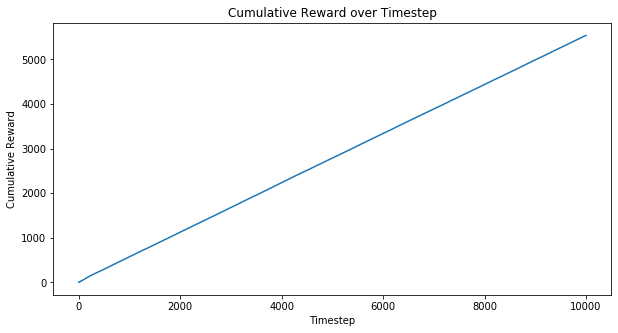

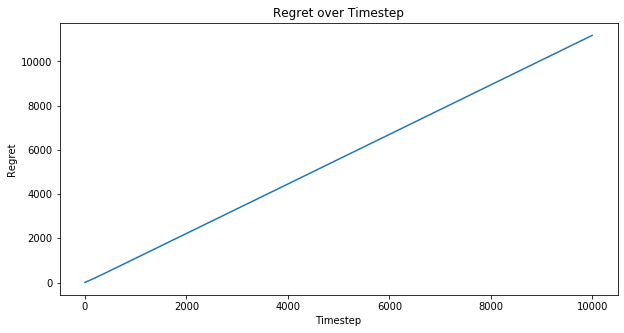

In [6]:
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = ThompsonBeta(num_actions)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Now let's prepare another simulation by setting a different distribution, that is set distribion = "normal"

Run the simulation and observe the results.

What do you think the regret graph would look like?